**Loading Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from bokeh.plotting import figure, output_file, show, output_notebook
from sklearn.model_selection import train_test_split ,StratifiedKFold
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from bokeh.models import ColumnDataSource, LabelSet
from plotly import figure_factory # heatmap library
output_notebook()
import warnings
warnings.filterwarnings('ignore')

**Loading the dataset**

***From this dataset, our goal is to predict which customers are likely to leave the bank. The target column, 'Exited,' contains boolean values: 1 indicates the customer has left the bank, while 0 indicates the customer remains active.***

In [ ]:
data = pd.read_csv('/content/Customer-Churn-Records.csv')

**Checking the shape of dataset**

In [ ]:
row,column = data.shape

print(f'The dataset has {row} rows and {column} columns')

The dataset has 10000 rows and 18 columns


In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


**To enhance clarity and alignment with machine learning terminology, the target column 'Exited' is being renamed to 'Churn'.**

In [ ]:
data.rename(columns={'Exited':'Churn'},inplace=True)

**Checking the null values in the dataset**

In [ ]:
data.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


**Since no null value is present. No null values treatment required**

In [ ]:
data[data.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Complain,Satisfaction Score,Card Type,Point Earned


In [ ]:
data.duplicated().sum()

np.int64(0)

**Since no duplicate value is present. No duplicate values treatment required**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Churn               10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

**RowNumber** - represents the sequential index or row identifier for records in a dataset. It does not carry meaningful information and holds no significance when applied in machine learning algorithms

**CustomerId** - contains random values, It does not carry meaningful information

**Surname** - the surname of a customer has no impact on their decision to leave the bank.

In [ ]:
data.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

Hence dropping these columns.

**Checking the number of unique values in all cloumns**

In [ ]:
unique_counts = {column: data[column].nunique() for column in data.columns} # creating dict of column name and unique values

for column, count in unique_counts.items():
    print(f"'{column}': {count}")

'CreditScore': 460
'Geography': 3
'Gender': 2
'Age': 70
'Tenure': 11
'Balance': 6382
'NumOfProducts': 4
'HasCrCard': 2
'IsActiveMember': 2
'EstimatedSalary': 9999
'Churn': 2
'Complain': 2
'Satisfaction Score': 5
'Card Type': 4
'Point Earned': 785


**Plotting the number of unique values**

In [ ]:
column_names = list(unique_counts.keys())
y = list(unique_counts.values())

#Creating the figure of the plot
plot = figure(x_range=column_names,
             title="Unique Value Counts per Column after dropping the redundant columns",
              width=600, height=500)

#Code to create the barplot
plot.vbar(x=column_names, top=y, width=0.8, color="green")

plot.xaxis.major_label_orientation = "vertical"
show(plot)

In [ ]:
row,column = data.shape

print(f'The dataset has {row} rows and {column} columns')

The dataset has 10000 rows and 15 columns


**Listing out the different types of columns left**

In [ ]:
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
other_columns = data.select_dtypes(exclude=['object', 'category']).columns
print(categorical_columns)
print(other_columns)

Index(['Geography', 'Gender', 'Card Type'], dtype='object')
Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Churn', 'Complain',
       'Satisfaction Score', 'Point Earned'],
      dtype='object')


**Categorical Columns** : Geography', 'Gender', 'Card Type'

**Numerical Columns** :'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard','IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
'Satisfaction Score', 'Point Earned'

**There are two types of analysis**
1. **Univariate Analysis** - single variable at a time
2. **Bivariate Analysis** - Checking the relationship between two variables

# Univariate Analysis

**First will try to analyze the target (dependent) column which is 'Churn'**



1.   Churn = 1 → The customer left the Bank.
2.   Churn = 0 → The customer stayed with the Bank.




**mapping 1 and 0 to text label for charts**

In [ ]:
data['Churn'] = data['Churn'].map({1:'Customer Left' , 0:'Customer Stayed'})  # mapping text values for better clarity at the time of visualizations

In [ ]:
print("\nValue Counts of 'Churn':")
print(data['Churn'].value_counts())


Value Counts of 'Churn':
Churn
Customer Stayed    7962
Customer Left      2038
Name: count, dtype: int64


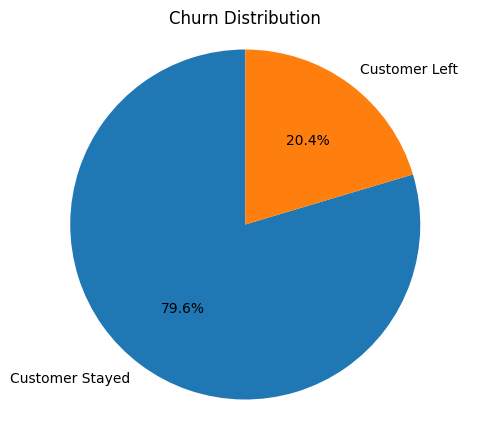

In [ ]:
plt.figure(figsize=(6, 5))
churn_counts = data['Churn'].value_counts()
plt.pie(churn_counts, labels=['Customer Stayed', 'Customer Left'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Churn Distribution')
plt.show()


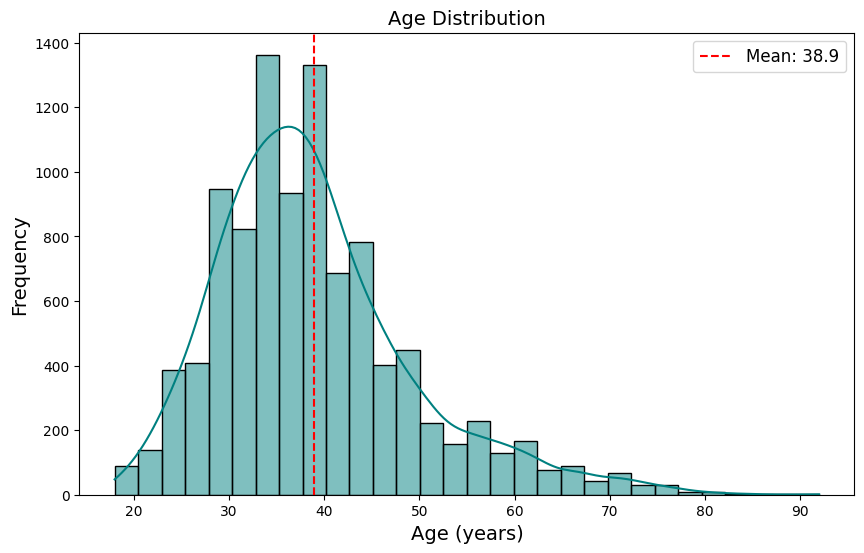

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde=True, color="teal", bins=30)
plt.title('Age Distribution', fontsize=14)
plt.xlabel('Age (years)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
mean_age = data['Age'].mean()
plt.axvline(mean_age, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {mean_age:.1f}')
plt.legend(fontsize=12)
plt.show()

**Let's Check the remaining columns**

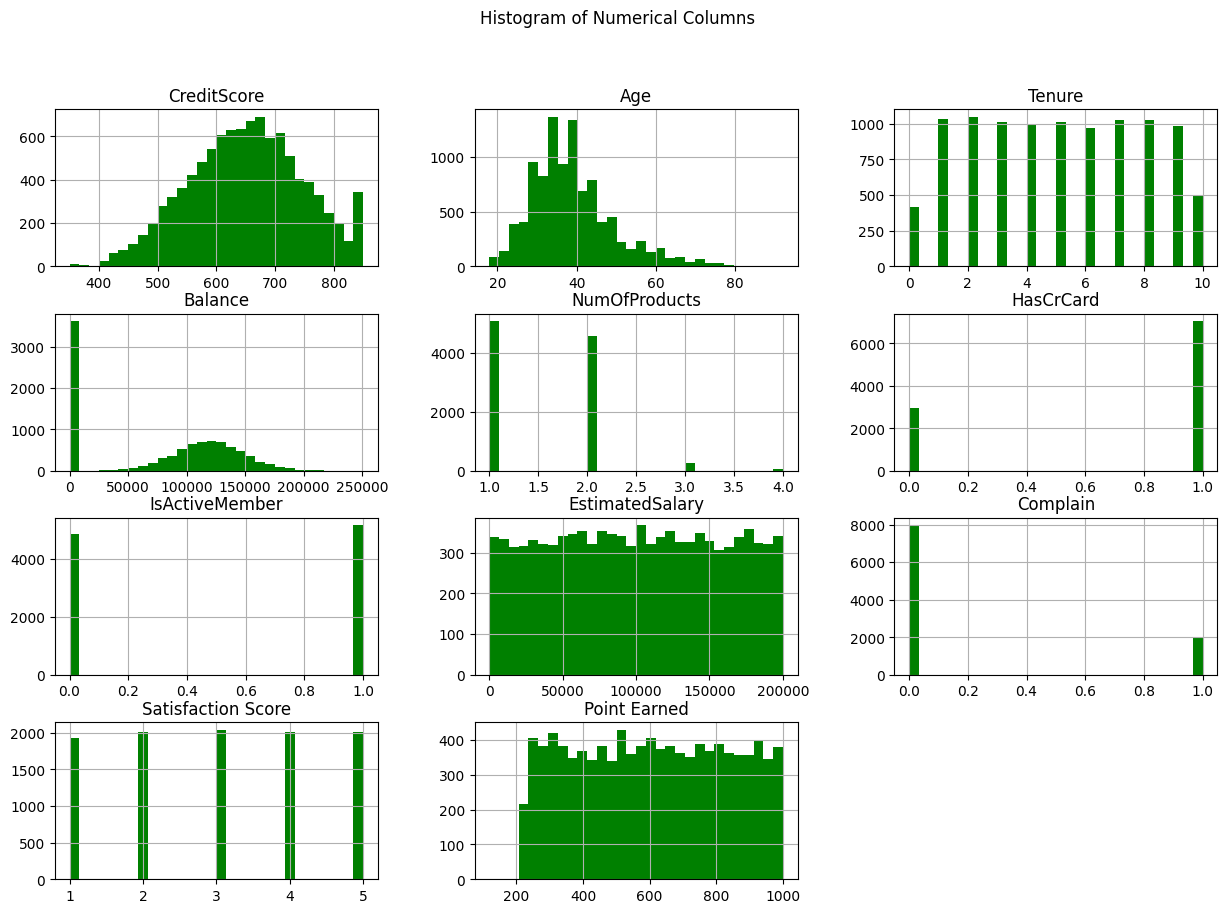

In [ ]:
data.hist(bins=30, figsize=(15, 10),color='green')
plt.suptitle("Histogram of Numerical Columns")
plt.show()

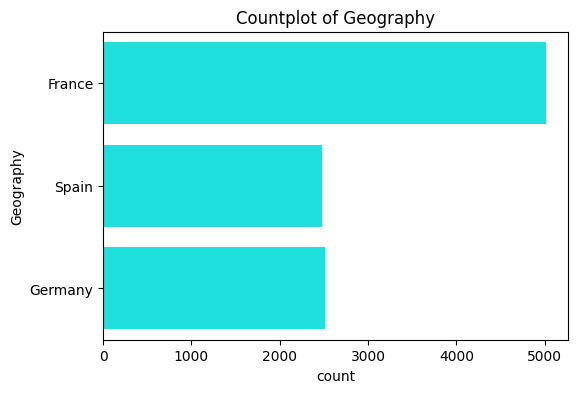

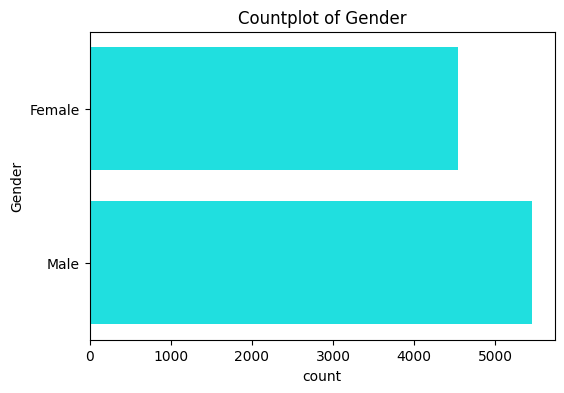

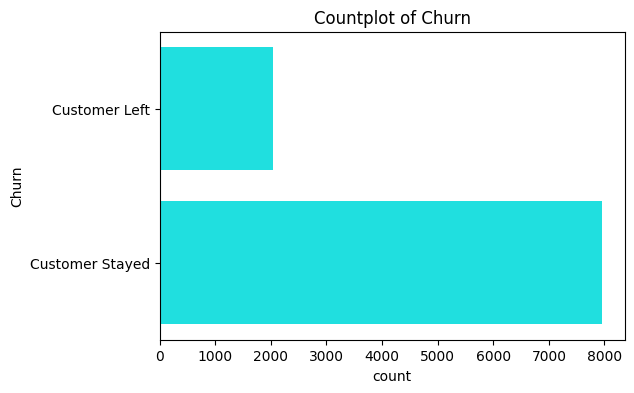

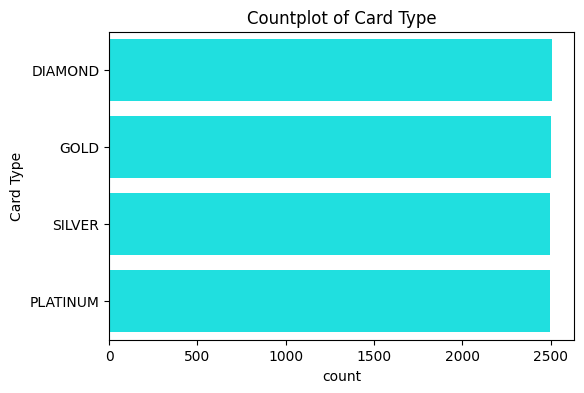

In [ ]:
categorical_cols = data.select_dtypes(include='object').columns
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(y=col, data=data,color='cyan')
    plt.title(f"Countplot of {col}")
    plt.show()

# Bivariate Analysis

**Exploring the relationship between Geography and Churn**

In [ ]:
data.groupby('Geography')['Churn'].value_counts()

Geography  Churn          
France     Customer Stayed    4203
           Customer Left       811
Germany    Customer Stayed    1695
           Customer Left       814
Spain      Customer Stayed    2064
           Customer Left       413
Name: count, dtype: int64

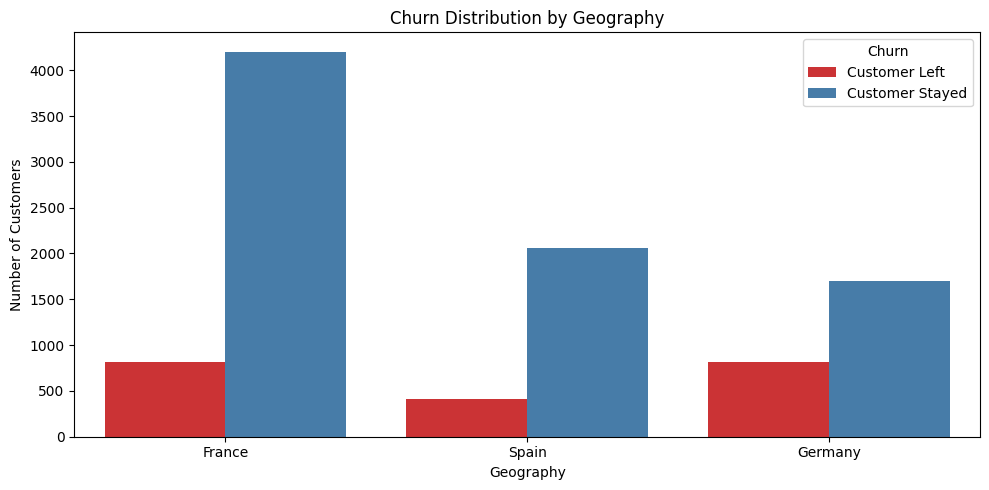

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x="Geography", hue="Churn", data=data, palette="Set1")
plt.title("Churn Distribution by Geography")
plt.xlabel("Geography")
plt.ylabel("Number of Customers")
plt.legend(title="Churn" )
plt.tight_layout()
plt.show()

In [ ]:
churn_by_country = data.groupby('Geography')['Churn'].value_counts(normalize=True).unstack() * 100
print(churn_by_country)

Churn      Customer Left  Customer Stayed
Geography                                
France         16.174711        83.825289
Germany        32.443204        67.556796
Spain          16.673395        83.326605


**Exploring the relationship between Gender and Churn**

In [ ]:
data.groupby('Gender')['Churn'].value_counts()

Gender  Churn          
Female  Customer Stayed    3404
        Customer Left      1139
Male    Customer Stayed    4558
        Customer Left       899
Name: count, dtype: int64

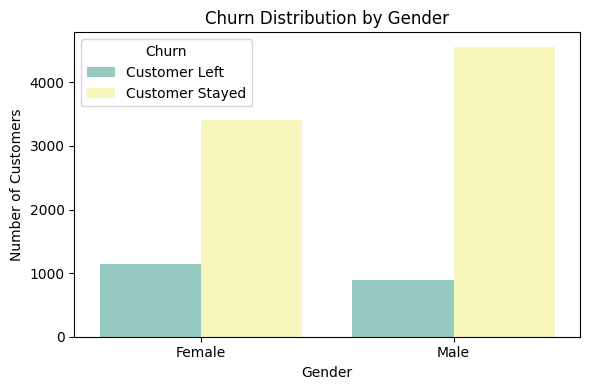

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Gender", hue="Churn", data=data, palette="Set3")
plt.title("Churn Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Customers")
plt.legend(title="Churn")
plt.tight_layout()
plt.show()

In [ ]:
churn_by_Gender = data.groupby('Gender')['Churn'].value_counts(normalize=True).unstack() * 100
print(churn_by_Gender)

Churn   Customer Left  Customer Stayed
Gender                                
Female      25.071539        74.928461
Male        16.474253        83.525747


***Exploring the relationship between Card Type and Churn***

In [ ]:
card_type_exited = data.groupby(['Card Type', 'Churn'])['Churn'].count().unstack(fill_value=0)

print(card_type_exited)

Churn      Customer Left  Customer Stayed
Card Type                                
DIAMOND              546             1961
GOLD                 482             2020
PLATINUM             508             1987
SILVER               502             1994


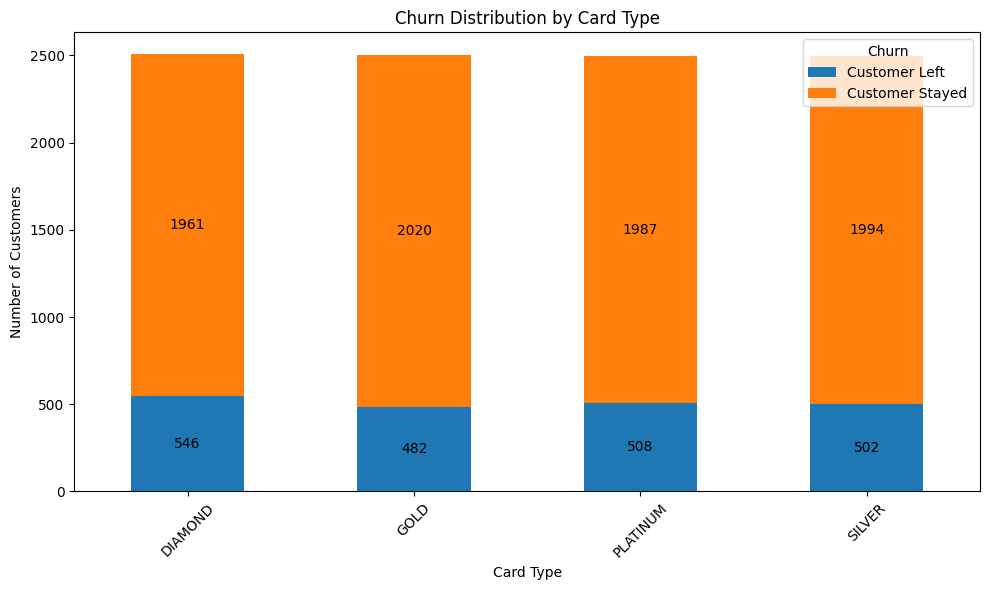

In [ ]:
card_type_exited.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Churn Distribution by Card Type')
plt.xlabel('Card Type')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(title='Churn')

# Annotate each bar with its value
for p in plt.gca().patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    plt.annotate(f'{int(height)}', (x + width/2, y + height/2), ha='center', va='center')

plt.tight_layout()
plt.show()


**Exploring the relationship between Complain and Churn**

In [ ]:
complain_exited = data.groupby(['Complain', 'Churn'])['Churn'].count().unstack(fill_value=0)

print(complain_exited)

Churn     Customer Left  Customer Stayed
Complain                                
0                     4             7952
1                  2034               10


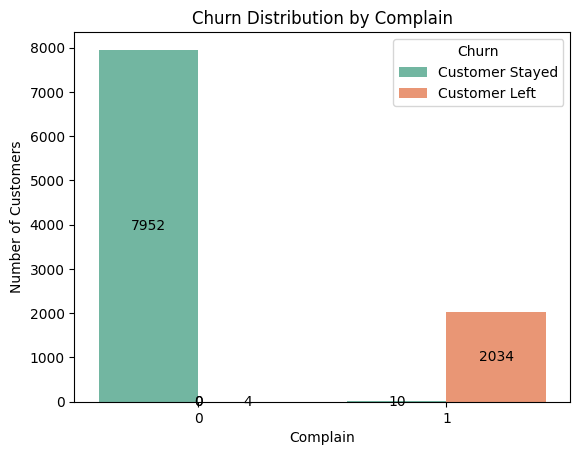

In [ ]:
sns.countplot(x="Complain", hue="Churn", data=data, palette="Set2")
plt.title("Churn Distribution by Complain")
plt.xlabel("Complain")
plt.ylabel("Number of Customers")
plt.legend(title="Churn")

for p in plt.gca().patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    plt.annotate(f'{int(height)}', (x + width/2, y + height/2), ha='center', va='center')

**Exploring the relationship between Credit Score and Age**

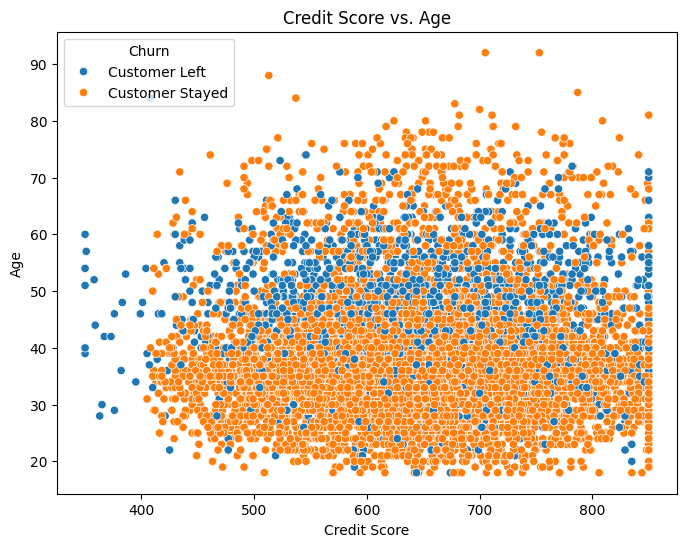

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='CreditScore', y='Age', hue='Churn', data=data)
plt.title('Credit Score vs. Age')
plt.xlabel('Credit Score')
plt.ylabel('Age')
plt.show()

**Exploring the relationship between Satisfaction Score and Churn**

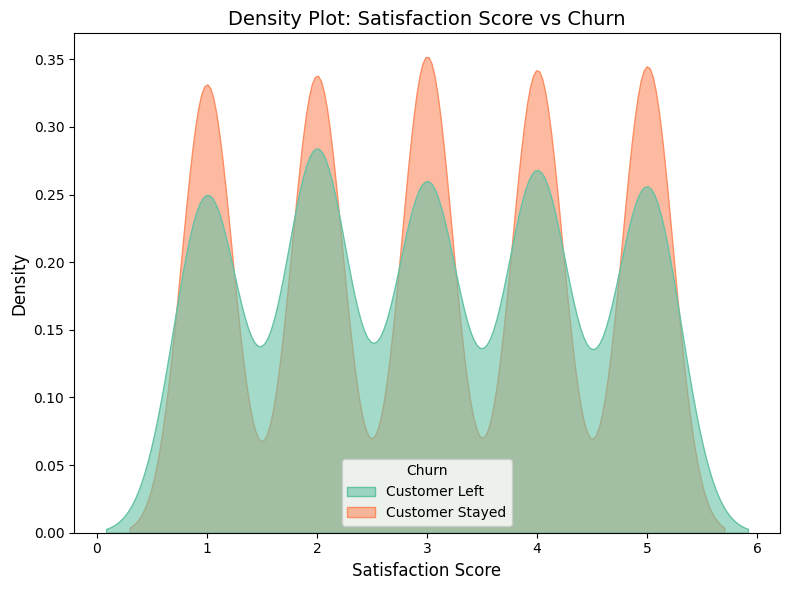

In [ ]:
# Create a density plot
plt.figure(figsize=(8, 6))
sns.kdeplot(data=data, x="Satisfaction Score", hue="Churn", fill=True, common_norm=False, alpha=0.6, palette="Set2")

# Add labels and title
plt.title("Density Plot: Satisfaction Score vs Churn", fontsize=14)
plt.xlabel("Satisfaction Score", fontsize=12)
plt.ylabel("Density", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


**Exploring the relationship between Age and Churn**

In [ ]:
age_bins = [18, 30, 45, 60, 75]
age_labels = ['18-30', '31-45', '46-60', '61-75']

# Analyze churn trends by age range
churn_trends = data.groupby([pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False), 'Churn']).size().unstack(fill_value=0)

print(churn_trends)

Churn  Customer Left  Customer Stayed
Age                                  
18-30            124             1517
31-45            870             5149
46-60            897              917
61-75            146              326


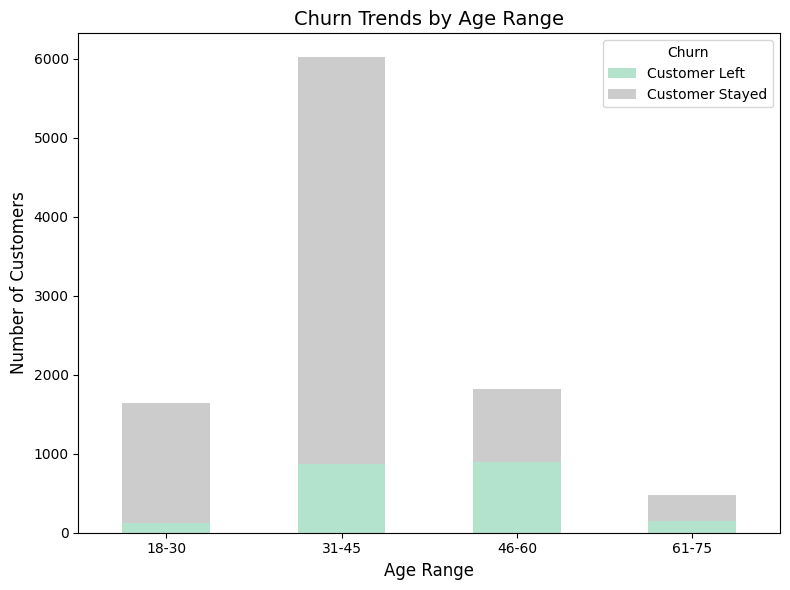

In [ ]:
churn_trends.plot(kind='bar', stacked=True, figsize=(8, 6), colormap="Pastel2")
plt.title("Churn Trends by Age Range", fontsize=14)
plt.xlabel("Age Range", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Churn", fontsize=10)
plt.tight_layout()
plt.show()


In [ ]:
data.groupby('IsActiveMember')['Churn'].value_counts().unstack(fill_value=0)

Churn,Customer Left,Customer Stayed
IsActiveMember,,
0,1303,3546
1,735,4416


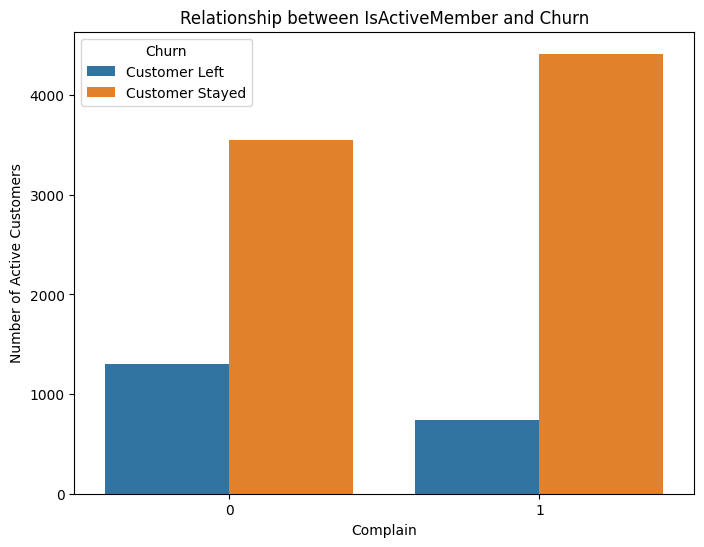

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='IsActiveMember', hue='Churn', data=data)
plt.title('Relationship between IsActiveMember and Churn')
plt.xlabel('Complain')
plt.ylabel('Number of Active Customers')
plt.show()


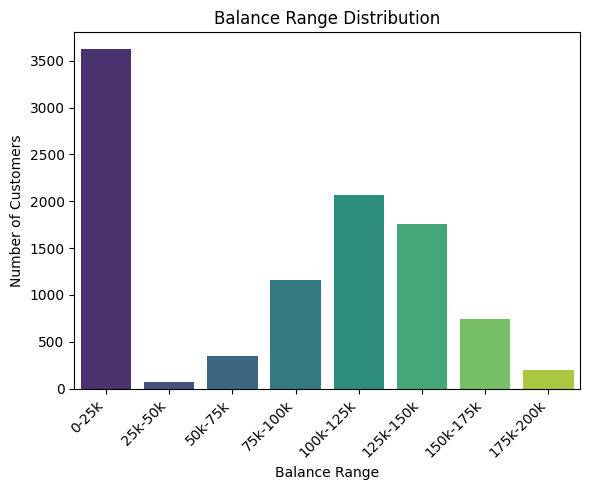

In [ ]:
balance_bins = [0, 25000, 50000, 75000, 100000, 125000,150000,175000,200000]
balance_labels = ['0-25k', '25k-50k', '50k-75k', '75k-100k', '100k-125k','125k-150k','150k-175k','175k-200k']

# Create a new column with balance ranges
data['BalanceRange'] = pd.cut(data['Balance'], bins=balance_bins, labels=balance_labels, right=False, include_lowest=True)

# Calculate churn rate by balance range
churn_by_balance = data.groupby('BalanceRange')['Churn'].value_counts(normalize=True).unstack() * 100

# Plotting
plt.figure(figsize=(6, 5))  # Adjust figure size if needed

# Bar plot for balance distribution
sns.countplot(x='BalanceRange', data=data, palette='viridis')
plt.title('Balance Range Distribution')
plt.xlabel('Balance Range')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


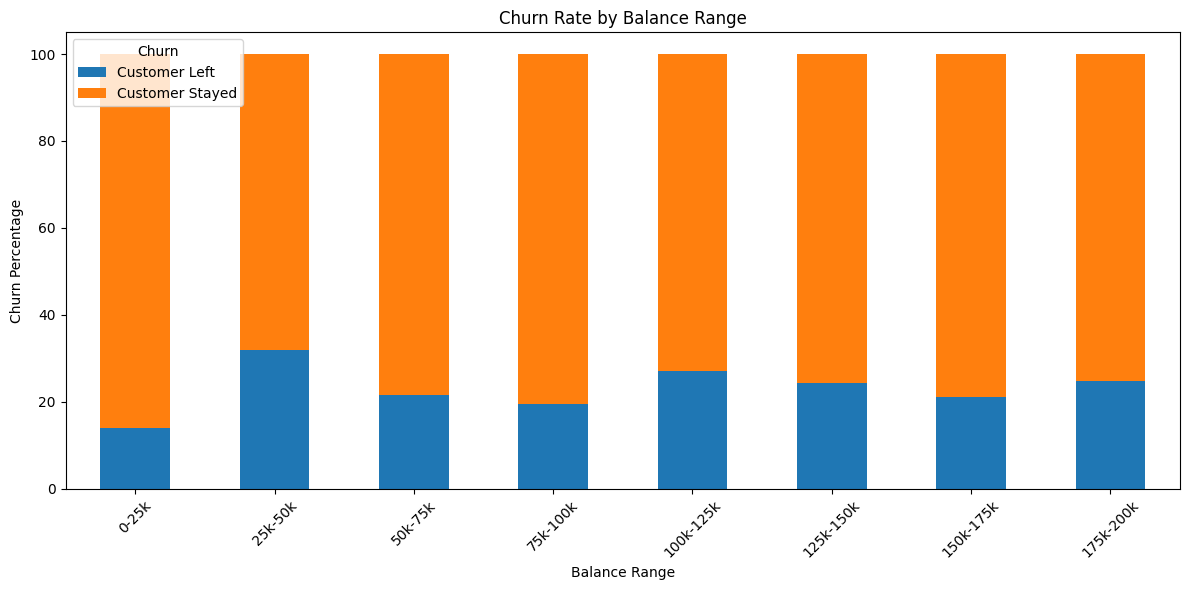

In [ ]:
# Bar plot for churn rate by balance range
churn_by_balance.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Churn Rate by Balance Range')
plt.xlabel('Balance Range')
plt.ylabel('Churn Percentage')
plt.xticks(rotation=45)
plt.legend(title='Churn', loc='upper left')
plt.tight_layout()
plt.show()

data.drop('BalanceRange', axis=1, inplace=True)

**Ways to check outliers in numerical columns**
1. **Using describe method**
2. **Using graphs**

**There are many techniques to treat the outliers**
1. **Z-score**
2. **Quantile method**
3. **IQR method**

**Below check_treat_outliers function detect outliers using box plot and treat it with IQR method**

In [ ]:
def check_treat_outliers(data, column): # function to check and treat outliers

    plt.figure(figsize=(12, 6))

    # First subplot
    # check outliers
    plt.subplot(1, 2, 1)
    box_plot = sns.boxplot(y=data[column], color="skyblue")
    plt.title(f'Box Plot of {column}', fontsize=14)
    median_value = data[column].median()
    plt.text(0, median_value, f'Median: {median_value:.2f}', ha='center', va='bottom', color='red', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.ylabel(column)
    for line in box_plot.lines:
      if line.get_linestyle() == 'None':
        line.set_markerfacecolor('red')
        line.set_markersize(8)

    # Second subplot
    # treat outliers
    plt.subplot(1, 2, 2)
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]
    outlier_info = {
        'count': outliers.shape[0],
        'values': outliers.tolist()
        }
    print(f'{column} values outside the range [{lower_bound:.2f}, {upper_bound:.2f}] are outliers')
    print(f"Outlier Info for '{column}': {outlier_info}")

    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

    median_value = data[column].median()
    sns.boxplot(y=data[column], color="skyblue")
    plt.title(f'Box Plot of {column} (Outliers Treated)')
    plt.text(0, median_value, f'Median: {median_value:.2f}', ha='center', va='bottom', color='red', fontsize=12)
    plt.ylabel(column)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.show()
    return None

***Using describe method***

In [ ]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.204400,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.403283,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,5.000000,1000.000000


***Binary variables like HasCrCard, IsActiveMember and Complain are limited to 0 and 1, so outlier detection isn't applicable***

***Using Graph approch***

**1. CreditScore**

CreditScore values outside the range [383.00, 919.00] are outliers
Outlier Info for 'CreditScore': {'count': 15, 'values': [376, 376, 363, 359, 350, 350, 358, 351, 365, 367, 350, 350, 382, 373, 350]}


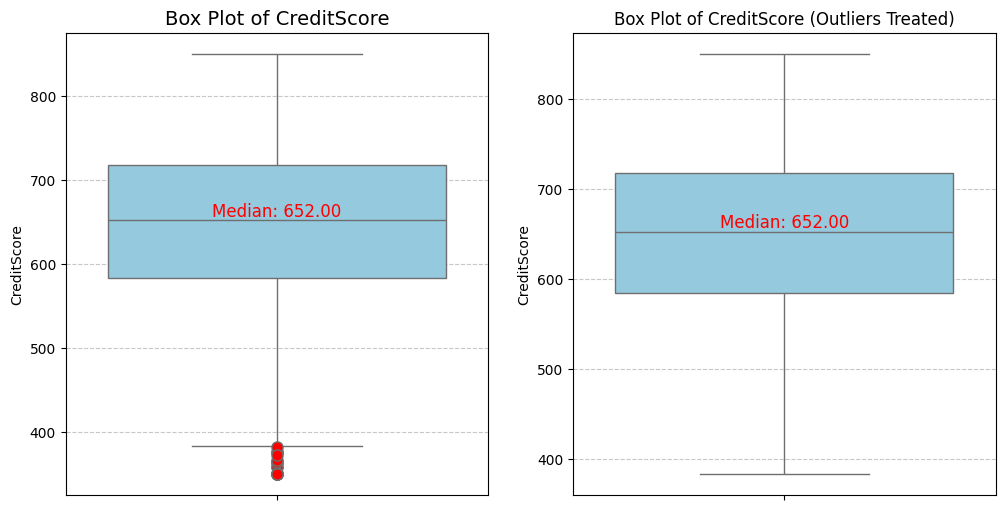

In [ ]:
check_treat_outliers(data,'CreditScore')

**2. Age**

Age values outside the range [14.00, 62.00] are outliers
Outlier Info for 'Age': {'count': 359, 'values': [66, 75, 65, 73, 65, 72, 67, 67, 79, 80, 68, 75, 66, 66, 70, 63, 72, 64, 64, 70, 67, 82, 63, 69, 65, 69, 64, 65, 74, 67, 66, 67, 63, 70, 71, 72, 67, 74, 76, 66, 63, 66, 68, 67, 63, 71, 66, 69, 73, 65, 66, 64, 69, 64, 77, 74, 65, 70, 67, 69, 67, 74, 69, 74, 74, 64, 63, 63, 70, 74, 65, 72, 77, 66, 65, 74, 88, 63, 71, 63, 64, 67, 70, 68, 72, 71, 66, 75, 67, 73, 69, 76, 63, 85, 67, 74, 76, 66, 69, 66, 72, 63, 71, 63, 74, 67, 72, 72, 66, 84, 71, 66, 63, 74, 69, 84, 67, 64, 68, 66, 77, 70, 67, 79, 67, 76, 73, 66, 67, 64, 73, 76, 72, 64, 71, 63, 70, 65, 66, 65, 80, 66, 63, 63, 63, 63, 66, 74, 69, 63, 64, 76, 75, 68, 69, 77, 64, 66, 74, 71, 67, 68, 64, 68, 70, 64, 75, 66, 64, 78, 65, 74, 64, 64, 71, 77, 79, 70, 81, 64, 68, 68, 63, 79, 66, 64, 70, 69, 71, 72, 66, 68, 63, 71, 72, 72, 64, 78, 75, 65, 65, 67, 63, 68, 71, 73, 64, 66, 71, 69, 71, 66, 76, 69, 73, 64, 64, 75, 73, 71, 72, 63, 67, 6

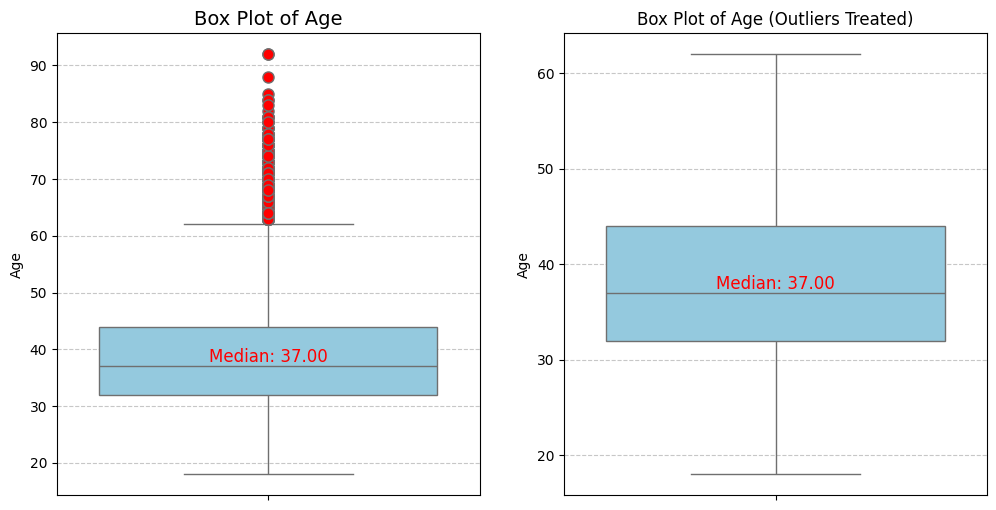

In [ ]:
check_treat_outliers(data,'Age')

**3. Tenure**

Tenure values outside the range [-3.00, 13.00] are outliers
Outlier Info for 'Tenure': {'count': 0, 'values': []}


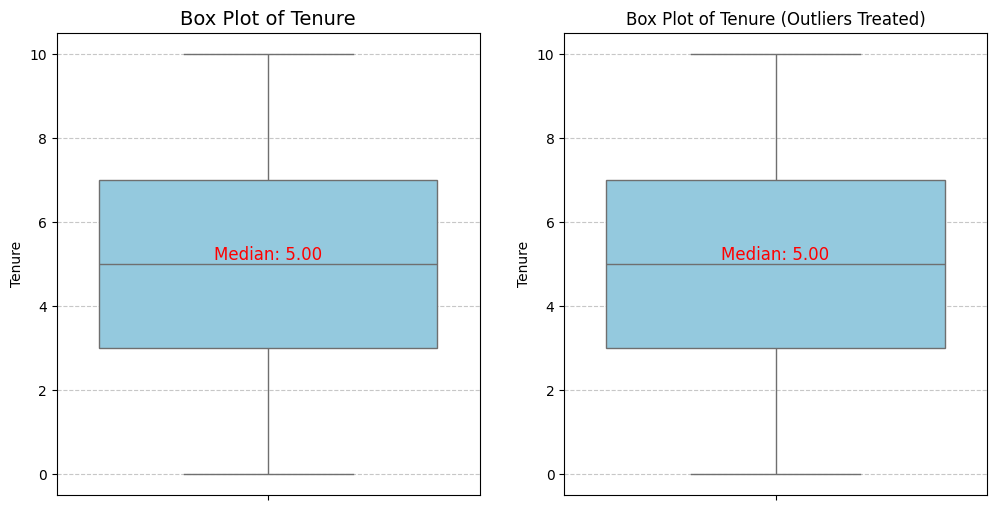

In [ ]:
check_treat_outliers(data,'Tenure')

**4.Balance**

Balance values outside the range [-191466.36, 319110.60] are outliers
Outlier Info for 'Balance': {'count': 0, 'values': []}


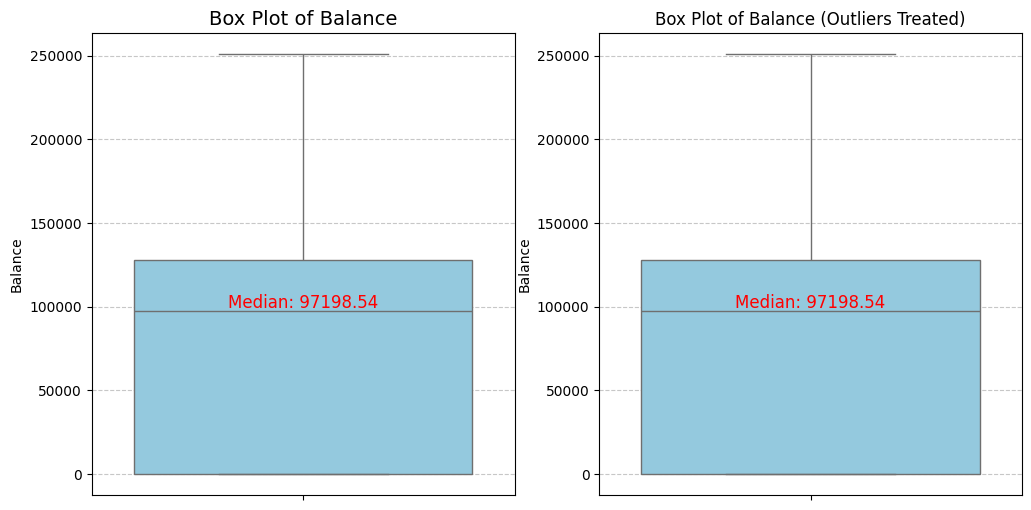

In [ ]:
check_treat_outliers(data,'Balance')

**5.NumOfProducts**

NumOfProducts values outside the range [-0.50, 3.50] are outliers
Outlier Info for 'NumOfProducts': {'count': 60, 'values': [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]}


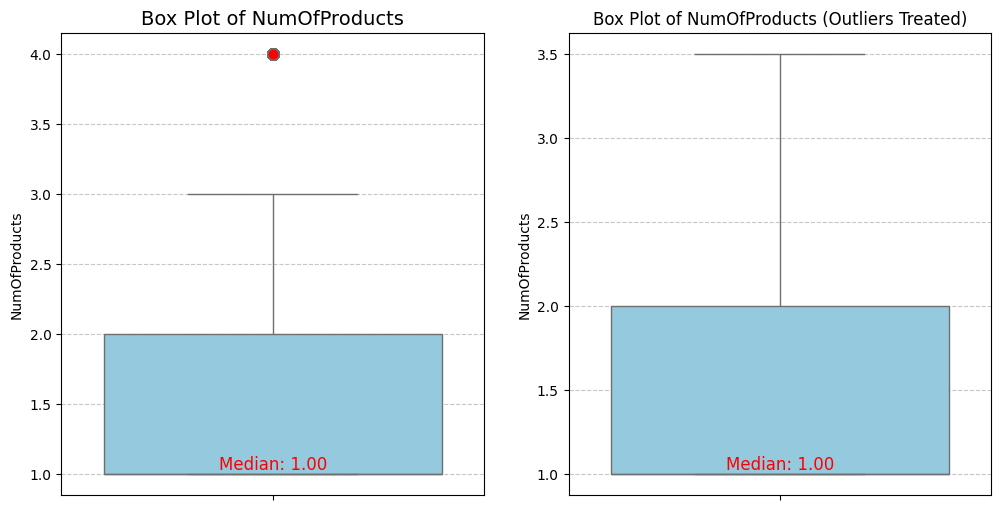

In [ ]:
check_treat_outliers(data,'NumOfProducts')

**6.Satisfaction Score**

Satisfaction Score values outside the range [-1.00, 7.00] are outliers
Outlier Info for 'Satisfaction Score': {'count': 0, 'values': []}


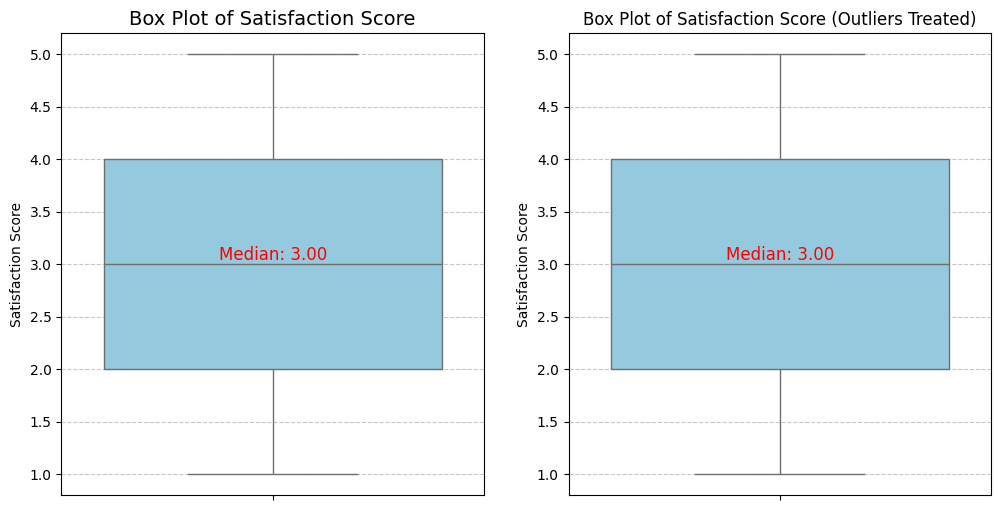

In [ ]:
check_treat_outliers(data,'Satisfaction Score')

**7.Point Earned**

Point Earned values outside the range [-176.50, 1387.50] are outliers
Outlier Info for 'Point Earned': {'count': 0, 'values': []}


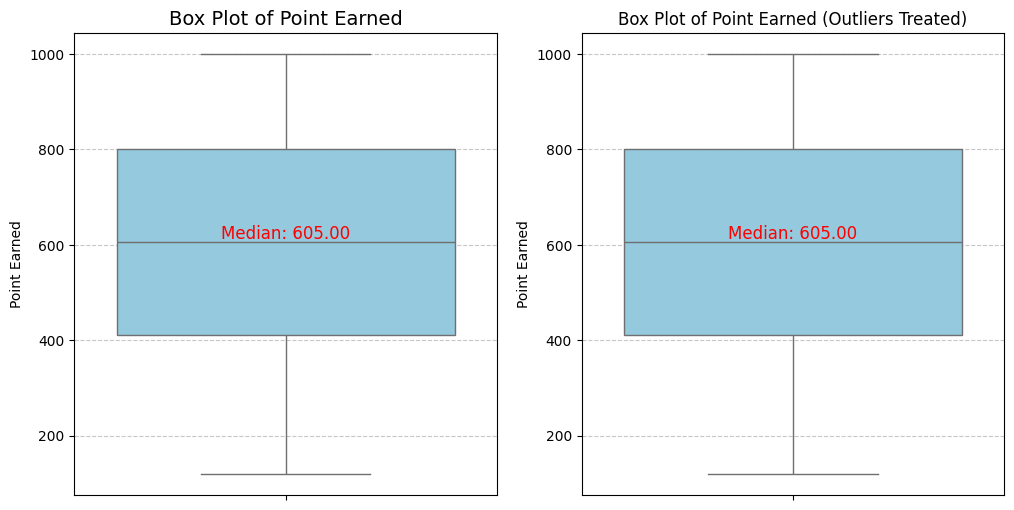

In [ ]:
check_treat_outliers(data,'Point Earned')

In [ ]:
row,column = data.shape

print(f'The dataset has {row} rows and {column} columns')

The dataset has 10000 rows and 15 columns


***Encoding the categorical columns into numerical columns for machine learning models ***



1.   Label Encoder for values more than 2
2.   Map function for 2 value columns




In [ ]:
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

columns_with_2_values = [
    col for col in categorical_columns if data[col].nunique() == 2
]

print("Columns with 2 unique categorical values:", columns_with_2_values)

Columns with 2 unique categorical values: ['Gender', 'Churn']


In [ ]:
data['Churn'] = data['Churn'].map({'Customer Left':1 , 'Customer Stayed':0})

In [ ]:
data['Gender'] = data['Gender'].map({'Female':1 , 'Male':0})

In [ ]:
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

# Get column names with more than 2 unique values
columns_with_more_than_2_values = [
    col for col in categorical_columns if data[col].nunique() > 2
]

print("Columns with more than 2 unique categorical values:", columns_with_more_than_2_values)

Columns with more than 2 unique categorical values: ['Geography', 'Card Type']


In [ ]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply encoding
for col in categorical_columns:
        # Use Label Encoding for high-cardinality columns
        data[col] = label_encoder.fit_transform(data[col].astype(object))


In [ ]:
data.shape

(10000, 15)

In [ ]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Complain,Satisfaction Score,Card Type,Point Earned
0,619.0,0,1,42.0,2.0,0.00,1.0,1,1,101348.88,1,1,2.0,0,464.0
1,608.0,2,1,41.0,1.0,83807.86,1.0,0,1,112542.58,0,1,3.0,0,456.0
2,502.0,0,1,42.0,8.0,159660.80,3.0,1,0,113931.57,1,1,3.0,0,377.0
3,699.0,0,1,39.0,1.0,0.00,2.0,0,0,93826.63,0,0,5.0,1,350.0
4,850.0,2,1,43.0,2.0,125510.82,1.0,1,1,79084.10,0,0,5.0,1,425.0


**Correlation between features/variables based on heat map**

In [ ]:
cor=data.corr() # Correlation Matrix
f=figure_factory.create_annotated_heatmap(cor.values,list(cor.columns),list(cor.columns),cor.round(2).values,showscale=True)
f.show()

From the correlation plot , It is clearly visible that Churn and Complain column are highly correlated which can cause data leakage. Hence we will drop the complain coulmn.

In [ ]:
data.drop('Complain',axis=1,inplace=True)

In [ ]:
correlation_with_target = abs(data.corr()['Churn']).sort_values(ascending=False)
print(correlation_with_target)

# Set a correlation threshold (e.g., 0.1)
threshold = 0.1

# Select features with correlation above the threshold
important_features = correlation_with_target[correlation_with_target > threshold].index.tolist()

# Remove the target variable itself from the list
important_features.remove('Churn')

print(f"Important features based on correlation (threshold = {threshold}): {important_features}")



Churn                 1.000000
Age                   0.312413
IsActiveMember        0.156356
Balance               0.118577
Gender                0.106267
NumOfProducts         0.058979
Geography             0.035712
CreditScore           0.026132
Tenure                0.013656
EstimatedSalary       0.012490
Card Type             0.010861
HasCrCard             0.006976
Satisfaction Score    0.005849
Point Earned          0.004628
Name: Churn, dtype: float64
Important features based on correlation (threshold = 0.1): ['Age', 'IsActiveMember', 'Balance', 'Gender']


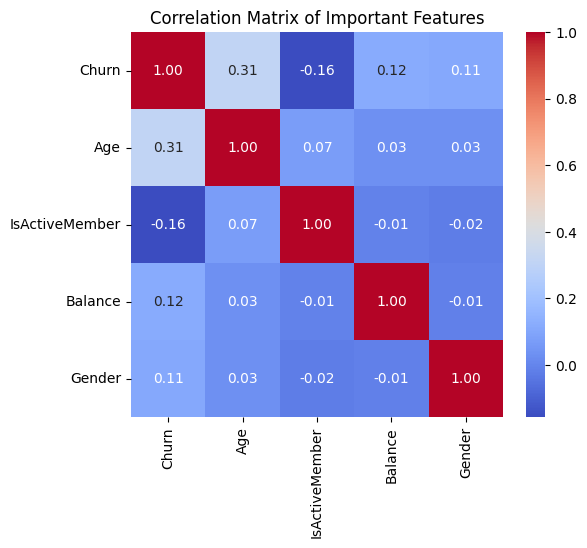

In [ ]:
important_df = data[['Churn'] + important_features]

# Calculate the correlation matrix for the important features
correlation_matrix = important_df.corr()

# Create the correlation plot
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Important Features')
plt.show()


Checking the target counts for balancing

In [ ]:
class_balance = data['Churn'].value_counts(normalize=True) * 100
class_balance

,proportion
Churn,
0,79.62
1,20.38


Separate features and target variable

In [ ]:
# Separate features and target variable
X = data.drop('Churn', axis=1)
y = data['Churn']

In [ ]:
print(X.columns)

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')


In [ ]:
print(f"Final number of features: {X.shape[1]}")

Final number of features: 13


Normalization/ Standardisation of the dataset

In [ ]:
# Normalization/ Standardisation of the dataset
X_scaled=StandardScaler().fit_transform(X)

Train-test split with stratification

In [ ]:
# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42,stratify=y)

Balancing the dataset using SMOTE technique

In [ ]:
# Balancing the dataset using SMOTE technique
X_train, y_train=SMOTE(random_state=1).fit_resample(X_train,y_train) # Balancing the class labels

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Initializing the Random Forest Classifier
RF_model = RandomForestClassifier(n_estimators=150, max_depth=6,class_weight='balanced',random_state=42)

# Training the model on the training set
RF_model.fit(X_train,y_train)

# Predicting on the training and testing sets
y_train_pred_rf = RF_model.predict(X_train)
y_test_pred_rf = RF_model.predict(X_test)

# Calculating accuracy scores
random_forest_training_accuracy = accuracy_score(y_train, y_train_pred_rf)
random_forest_test_accuracy = accuracy_score(y_test, y_test_pred_rf)

# Printing the results
print(f"Random Forest Training Accuracy: {random_forest_training_accuracy:.4f}")
print(f"Random Forest Test Accuracy: {random_forest_test_accuracy:.4f}")

Random Forest Training Accuracy: 0.8451
Random Forest Test Accuracy: 0.8100


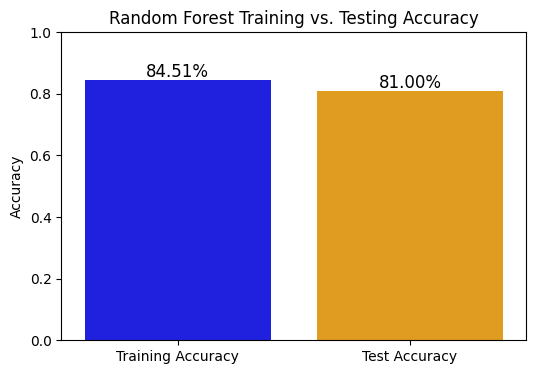

In [ ]:
# Accuracy values
Random_Forest_accuracies = [random_forest_training_accuracy, random_forest_test_accuracy]
labels = ['Training Accuracy', 'Test Accuracy']

# Create the bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=labels, y=Random_Forest_accuracies, palette=['blue', 'orange'])

# Add value labels
for i, v in enumerate(Random_Forest_accuracies):
    plt.text(i, v + 0.01, f"{v:.2%}", ha='center', fontsize=12)

# Customize the plot
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Random Forest Training vs. Testing Accuracy")
plt.show()

Model Evaluation

In [ ]:
# Evaluating the random forest
from sklearn import metrics
random_forest_Accuracy= metrics.accuracy_score(y_test,y_test_pred_rf) # Calculating the accuracy of the model build
random_forest_Recall= metrics.recall_score(y_test,y_test_pred_rf) # Calculating the recall of the model build
random_forest_Precision= metrics.precision_score(y_test,y_test_pred_rf) # Calculating the precision of the model build
random_forest_F1_score= metrics.f1_score(y_test,y_test_pred_rf) # Calculating the f1 score of the model build
print(f"Accuracy: {random_forest_Accuracy:.4f}")
print(f"Recall:' {random_forest_Recall:.4f}")
print(f"Precision: {random_forest_Precision:.4f}")
print(f"F1-score: {random_forest_F1_score:.4f}")

Accuracy: 0.8100
Recall:' 0.7267
Precision: 0.5242
F1-score: 0.6091


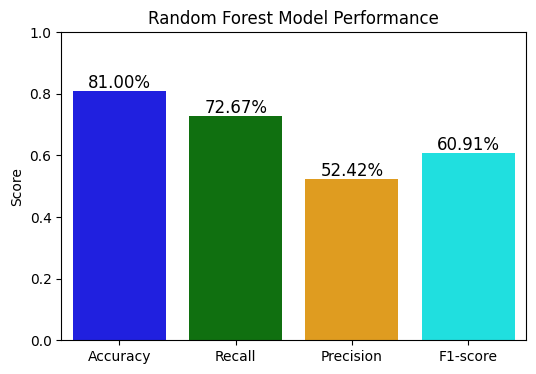

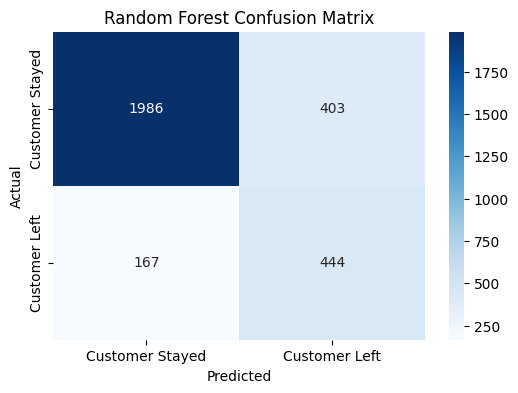

In [ ]:
# Metrics values
rf_metrics_values = [random_forest_Accuracy, random_forest_Recall, random_forest_Precision, random_forest_F1_score]
rf_metrics_labels = ['Accuracy', 'Recall', 'Precision','F1-score']

# Create the bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=rf_metrics_labels, y=rf_metrics_values, palette=['blue', 'green', 'orange','cyan'])

# Add value labels
for i, v in enumerate(rf_metrics_values):
    plt.text(i, v + 0.01, f"{v:.2%}", ha='center', fontsize=12)

# Customize the plot
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("Random Forest Model Performance")
plt.show()

# Generating confusion matrix
Random_Forest_cm = confusion_matrix(y_test, y_test_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(Random_Forest_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Customer Stayed', 'Customer Left'],
            yticklabels=['Customer Stayed', 'Customer Left'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()